<a href="https://colab.research.google.com/github/thaugenes/4850/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580 Assignment 6

#### Students: Tor Haugenes (th455) and Jose Osorio (jao82)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

The total number of arrivals (X) can be expressed as the integral of the rate function:

X $= \int_{0}^{12} \lambda(t) \, dt$

The probability of more than 250 customers arriving at the Gimme! store within one workday is then:

$P(X > 250) = 1 - \sum_{k=0}^{250} \frac{e^{-X}X^k}{k!}$

where the rate function $\lambda(t)$ is given in the question formulation above.

Therefore (plugging into Wolfram Alpha) we find:

X $ =\int_{0}^{12} 1/56*(5t^3 - 90t^2 + 300t + 1480) = 240$

And thus, $P(X > 250) = 1 - \sum_{k=0}^{250} \frac{e^{-240}240^k}{k!} = 1 - 0.753 = 0.247$

___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.



In [18]:
num_sim = 500
list1 = []
t_values = np.arange(0, 12, 0.0167)  # Time intervals from 0 to 12 hours

In [19]:
def rate(t):
    return 1/56 * (5 * t**3 - 90 * t**2 + 300 * t + 1480)

def pois_arrival(rate, time_interval):
    poisson_lambda = rate * time_interval
    return np.random.poisson(lam = poisson_lambda)

In [20]:
for x in range(num_sim):
    numCust = sum([pois_arrival(rate(t), 0.0167) for t in t_values])
    list1.append(numCust)

array1 = np.array(list1)
prob = np.sum(array1 > 250) / num_sim
CI = stats.t.interval(0.95, len(array1), loc = prob, scale = stats.sem(array1))
CI2 =  np.percentile(array1, [2.5, 97.5])

print("Estimated Probability:", prob)
print("95% Confidence Interval (Probability):", CI)
print("95% Confidence Interval (Expected Number of Customers Seen):", CI2)

Estimated Probability: 0.28
95% Confidence Interval (Probability): (-1.0275949483435853, 1.5875949483435854)
95% Confidence Interval (Expected Number of Customers Seen): [211. 269.]


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

In [21]:
hours = 12
list_c = []

for hr in range(hours):
    t_values = np.linspace(hr, hr + 1, 60, endpoint=False)  # Create hourly time intervals
    cust_data = []
    for x in range(num_sim):
        number_cust = sum([pois_arrival(rate(t), 0.0167) for t in t_values])
        cust_data.append(number_cust)

    avg_cust_hourly = np.mean(cust_data)
    list_c.append(avg_cust_hourly)

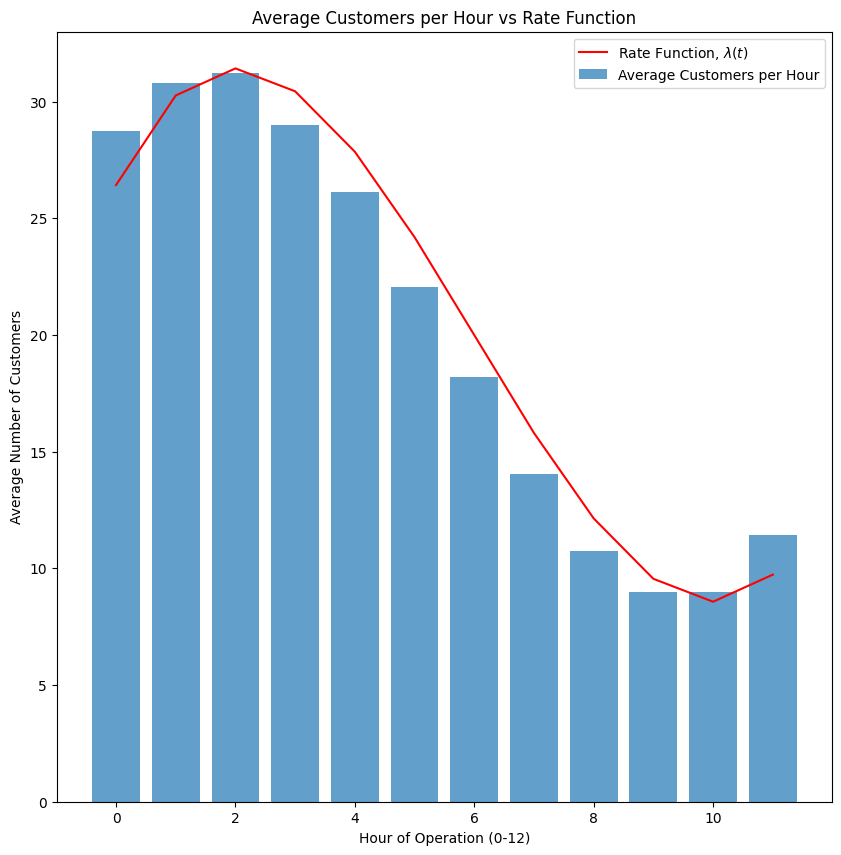

In [24]:
# Plotting Results
plt.figure(figsize=(10, 10))
plt.xlabel('Hour of Operation (0-12)')
plt.ylabel('Average Number of Customers')
plt.title('Average Customers per Hour vs Rate Function')
plt.bar(np.arange(hours), list_c, label='Average Customers per Hour', alpha=0.7)
plt.plot(np.arange(hours), [rate(hr) for hr in range(hours)], color='red', label='Rate Function, $\\lambda(t)$')
plt.legend()
plt.show()




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

Used ChatGPT for some inspiration on how to get started on each part of this question.

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [3]:
rounds = 100
mean_time = 0.5
friends_asked = []
counter = 0

while counter < rounds:
  completetime_you = np.random.exponential(scale=mean_time)
  # assuming 30 friends on line below #
  completetime_friends = np.random.exponential(scale=mean_time, size=30)

  index = np.argmax(completetime_friends > completetime_you)
  friends_asked.append(index + 1)
  counter += 1

In [8]:
expectation = np.mean(friends_asked)
CI = stats.t.interval(0.95, len(friends_asked), loc = expectation, scale = stats.sem(friends_asked))
print(f"Expected Number of Friends Asked = {expectation}")
print(f"95% CI = {CI}")

Expected Number of Friends Asked = 2.31
95% CI = (1.6847110848768265, 2.9352889151231736)


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


In [11]:
def q3_plot(replications, meantime, num_sim):
  result_accumulator = []
  for x in num_sim:
    num_friends_asked = []

    for y in range(x):
      completetime_you = np.random.exponential(scale=meantime)
      completetime_friends = np.random.exponential(scale=meantime, size = 30)

      index = np.argmax(completetime_friends > completetime_you)
      num_friends_asked.append(index + 1)

    expectation = np.mean(num_friends_asked)
    CI = stats.t.interval(0.95, len(num_friends_asked), loc = expectation, scale = stats.sem(num_friends_asked))

    result_accumulator.append((expectation, CI))

  estimates = [x[0] for x in result_accumulator]
  lowerbounds = [x[1][0] for x in result_accumulator]
  upperbounds = [x[1][1] for x in result_accumulator]
  # PLOT
  plt.figure(figsize=(10,10))
  plt.xlabel('# of Simulations')
  plt.ylabel('Expected Number of Friends Asked')
  plt.title("Number of Friends Estimates and 95% CI's vs # of Simulations")
  plt.errorbar(num_sim, estimates, yerr = [estimates[x] - lowerbounds[x] for x in range(len(num_sim))], fmt = 'o-', label = "estimate")
  plt.legend()
  plt.show

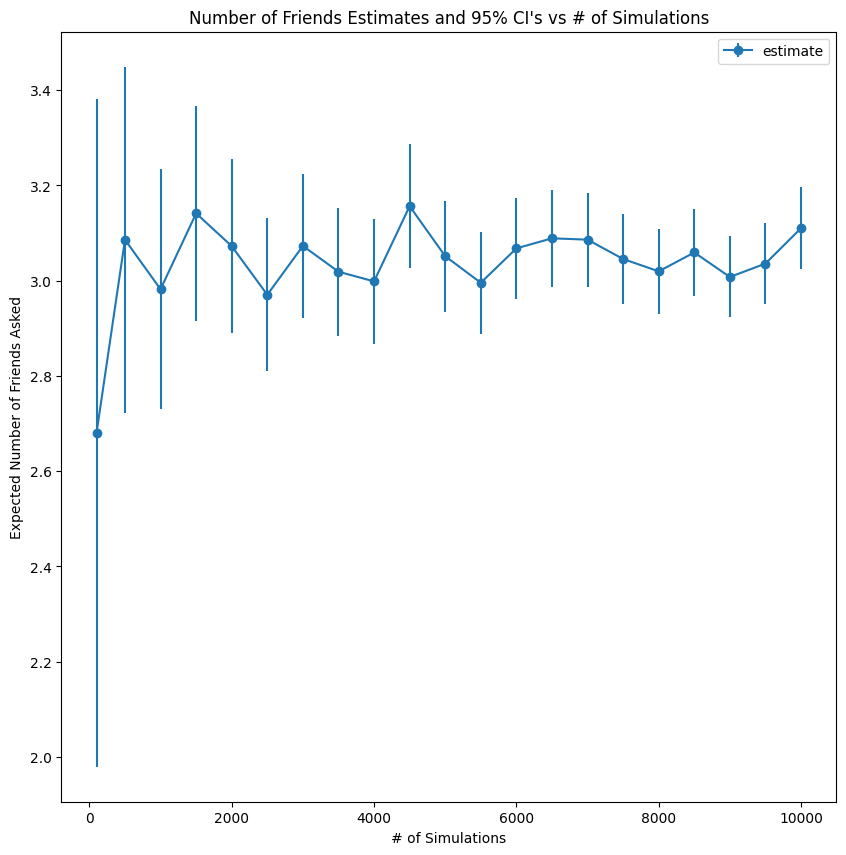

In [12]:
replications = 50
meantime = 0.5
num_sim = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
q3_plot(replications, meantime, num_sim)

___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.

$X_{i}$ - binary r.v. ($X_i = 1$ if the ith person surveyed took longer and $X_{i}$ = 0 if ith person took the same amount of time as you or shorter).

The CDF of the Exponential Distribution gives the probability of the ith person taking longer than you:


$P(T_{i} > T_{0}) = P(X_{i} = 1) = \int_{0}^{\infty} P(T_{i} > T_{0} | T_{0} = t) \cdot P(T_{0} = t) \,dt $


$T_{0}$ follows the Expo($\lambda = 2$) distribution, therefore:
$P(T_{0} = t) = 2e^{-2t}$.

And thus,

$P(T_i > T_0 | T_0 = t) = e^{-2t}$

Therefore, we find:

\
\begin{align*}
P(X_i = 1) & = \int_{0}^{\infty} P(T_i > T_0 | T_0 = t) \cdot f(t) \,dt \\
& = \int_{0}^{\infty} e^{-2t} \cdot 2e^{-2t} \,dt \\
& = \frac{1}{2}
\end{align*}


Now, using linearity of expectation, the expected number of queries until we find a person who took longer than you is given by:


$E\left(\sum_{i=1}^{\infty} X_{i}\right) = \sum_{i=1}^{\infty} E(X_{i}) = \sum_{i=1}^{\infty} \frac{1}{2} = \infty$

Therefore, the expected number of queries until we find a person who took longer than you is infinite, which checks out logically.